<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project5_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease

Heart disease prediction is a classification problem.

Variable Description:

1. #3 (age)
2. #4 (sex)
3. #9 (cp) - chest pain type = >  Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
4. #10 (trestbps) - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum Cholestrol
6. #16 (fbs) = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) - resting electrocardiographic results = >  Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang)  - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest
11. #41 (slope) - : the slope of the peak exercise ST segment = >  Value 1: upsloping, Value 2: flat, Value 3: downsloping
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute)

## Importing libraries

In [ ]:
import pandas as pd

#Use to install Mice Forest
#pip install miceforest   #install on local
#!pip install miceforest   #instal on colab
import miceforest as mf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm

warnings.filterwarnings('ignore')
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#To install kneed use below code
#pip install kneed
#!pip install kneed
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv',
                   na_values='?',
                   names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','goal'])
data=df.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,NaN,NaN,1


Observations:
1. There are a lot of missing values in the dataset.
2. All variables are numeric. 
3. The age, trestbps, chol, thalach, oldpeak are continuous variables. These may need to be scaled.
4. The others could be discrete variables.
5. 'ca' needs to be investigated.

In [ ]:
data.shape

(200, 14)

Observations:
1. There are only 200 rows in the dataset and 14 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  goal      200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


Observations:
1. The data types are either int or float.
2. Lost of missing data in the dataset.
3. Some variables have more than 50% data missing. I will be trying some imputers. These variables can be removed if needed.
4. Expecting that model performances may be less the imputed values will be used instead of the actual values.

In [ ]:
data.isnull().sum().mean()/data.shape[0]*100

24.928571428571427

Observations:
1. On an average about 25% of the data are missing from the dataset

In [ ]:
data.isnull().sum()/data.shape[0]*100

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       51.0
ca          99.0
thal        83.0
goal         0.0
dtype: float64

Observations:
1. More than 50% data is missing in 'ca', 'thal' and 'slope' variables.
2. More than 25% data is missing in 'trestbps', 'oldpeak', 'thalach' and 'exang' variables.
3. Less than 5% data is missing in 'chol' and 'fbs'.

Checking the unique values in the variables

In [ ]:
print("Unique values in each variable:\n")
for col in data.columns:
    print(f"{col} : {data[col].unique()}\n")

Unique values in each variable:

age : [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]

sex : [1 0]

cp : [4 3 2 1]

trestbps : [140. 130. 132. 142. 110. 120. 150. 180. 160. 126.  nan 128. 170. 152.
 116. 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135.
 158. 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]

chol : [260. 209. 218. 228. 213.   0. 236. 267. 166. 220. 177. 186. 100. 171.
 230. 281. 203. 277. 233. 240. 153. 224. 316. 311. 270. 217. 214. 252.
 339. 216. 276. 458. 241. 384. 297. 248. 308. 208. 227. 210. 245. 225.
 198. 195. 161. 258. 235. 305. 223. 282. 349.  nan 160. 312. 283. 142.
 211. 306. 222. 202. 197. 204. 274. 192. 298. 272. 200. 261. 181. 221.
 175. 219. 310. 232. 273. 182. 292. 289. 193. 170. 369. 173. 271. 244.
 285. 243. 237. 165. 287. 256. 264. 226. 207. 284. 337. 254. 300. 333.
 139. 385.]

fbs : [ 0.  1. nan]

restecg : [1 2 0]

thalach : [112. 127. 140. 149.  9

Observations:
1. Along with NaNs, there are 0s in chol(cholestrol) and trestbps(bloodpressure) which is very unlikely. These could be missing values as well.
2. It will make more sense to look at sex, cp, fbs, restecg, exang, slope, ca, thal and goal variables as categorical variables since these have discrete values.

In [ ]:
data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','goal']]=data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','goal']].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       200 non-null    int64   
 1   sex       200 non-null    category
 2   cp        200 non-null    category
 3   trestbps  144 non-null    float64 
 4   chol      193 non-null    float64 
 5   fbs       193 non-null    category
 6   restecg   200 non-null    category
 7   thalach   147 non-null    float64 
 8   exang     147 non-null    category
 9   oldpeak   144 non-null    float64 
 10  slope     98 non-null     category
 11  ca        2 non-null      category
 12  thal      34 non-null     category
 13  goal      200 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 10.8 KB


## Statistical Descriptions

In [ ]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,200.000000,200.0,200.0,144.000000,193.000000,193.0,200.0,147.000000,147.0,144.000000,98.0,2.0,34.0,200.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,1.0,3.0,5.0
top,NaN,1.0,4.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,2.0,0.0,7.0,1.0
freq,NaN,194.0,131.0,NaN,NaN,125.0,93.0,NaN,95.0,NaN,53.0,2.0,22.0,56.0
mean,59.350000,NaN,NaN,133.763889,178.746114,NaN,NaN,122.795918,NaN,1.320833,NaN,NaN,NaN,NaN
std,7.811697,NaN,NaN,21.537733,114.035232,NaN,NaN,21.990328,NaN,1.106236,NaN,NaN,NaN,NaN
min,35.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,69.000000,NaN,-0.500000,NaN,NaN,NaN,NaN
25%,55.000000,NaN,NaN,120.000000,0.000000,NaN,NaN,109.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,60.000000,NaN,NaN,130.000000,216.000000,NaN,NaN,120.000000,NaN,1.500000,NaN,NaN,NaN,NaN
75%,64.000000,NaN,NaN,147.000000,258.000000,NaN,NaN,140.000000,NaN,2.000000,NaN,NaN,NaN,NaN


Observations-
1. age: The Age range of the patients in this dataset is from 35 to 77. About 75% of the patients's age is >= 55years. The Age variable is close to a normal distribution.
2. sex: It have only 2 categories. Category 1 is the most frequent and dominating in the dataset. The variable is imbalanced.
3. cp: There are 4 categories in 'cp'. Category '4' is the most frequent and dominating.
4. trestbps: Few values are missing. With missing values, the distribution is slightly right skewed. Values ranges from 0 to 190. 0 values in Blood Pressure does not appear right.
5. chol: Some values are missing. Values are ranging from 0 to 458. Atleast 25% of the data are 0s. The distribution is left skewed. 0 value sin Cholestrol does not appear right.
6. fbs: Some values are missing. There are 2 categories in the variable. The Category '0' is dominating.
7. restecg: There are 3 categories in this variable. '1' is the most occuring category(close to 50%).
8. thalach: There are few missing values. The values range from 69 to 180. It is slightly right skewed.
9. exang: There are few missing values. There are 2 categories in the variable. Category '1' is repeating in atleast close to 50% of the dataset.
10. oldpeak: There are few missing values. The values range from -0.5 to 4. Atleast 25% of the data is <= 0. I wonder if negative value is valid. This needs more investigation. The distribution is left skewed.
11. slope: Many missing values. There are 3 categories in the variable. The category '2' occurs in atleast 25% of the data.
12. ca: Very poor condition in terms of values. Only 2 values are available and both are 0s.
13. thal: Lot of data missing. There are 3 categories in it and category '7' occurs about 64.7% of the available values.
14. goal: It has 5 categories. The category 1 occurs atleast 25% in the dataset.

## Data Cleaning

### Looking at the missing values

In [ ]:
pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['Missing_value_%']).sort_values(by='Missing_value_%', ascending=False).head(9)

,Missing_value_%
ca,99.0
thal,83.0
slope,51.0
trestbps,28.0
oldpeak,28.0
thalach,26.5
exang,26.5
chol,3.5
fbs,3.5


#### ca variable

In [ ]:
data[~data['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
28,56,1,4,120.0,100.0,0.0,0,120.0,1.0,1.5,2.0,0.0,7.0,1
39,59,1,4,154.0,0.0,0.0,1,131.0,1.0,1.5,NaN,0.0,NaN,0


Observations:
1. There are only two non-null values in 'ca' and that is 0.
2. Not enough candicates in 'ca' variable for any type of imputation.
2. Any imputation we do on this column is going to give us the value 0 for all the missing values in this column.
3. There will not be any variablity in this variable. Therefore, the 'ca' column is not useful for us. Hence can be removed.

In [ ]:
data.drop(['ca'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'goal'],
      dtype='object')

#### thal

In [ ]:
data[~data['thal'].isnull()]['thal'].value_counts()

7.0    22
6.0     8
3.0     4
Name: thal, dtype: int64

Observations:
1. There are 3 categories [3,7,6].
2. 83% of the values for 'thal' in the dataset are null values. The category 7 is the mode, however, if mode is used to fill the Null values, category 7 will fill those 83% of the 'thal' feature and dominate the other values. A more robust and efficient way must be used to impute the null values that can take the relationshipe with other variables into consideration.
3. I will experiment using models with and without the 'thal' variable to see which gives better performance

#### slope

In [ ]:
data[~data['slope'].isnull()]['slope'].value_counts()

2.0    53
3.0    29
1.0    16
Name: slope, dtype: int64

Observations:
1. There are 3 categories [1,2,3].
2. 51% of the values for 'thal' in the dataset are null values. The category 2 is the mode, however, if mode is used to fill the Null values, category 2 will fill those 51% of the 'slope' feature and dominate the other values. A more robust and efficient way must be used to impute the null values that can take the relationshipe with other variables into consideration.

#### trestbps

In [ ]:
data[~data['trestbps'].isnull()]['trestbps'].unique()

array([140., 130., 132., 142., 110., 120., 150., 180., 160., 126., 128.,
       170., 152., 116., 124.,   0., 122., 144., 154., 125., 104., 136.,
       134., 138., 178., 146., 135., 158., 106., 112., 102.,  96., 172.,
       155., 156., 118., 100., 190., 114., 127.])

Observations:
1. There is a 0 in the unique values. Which could be a missing value. Because usually blood pressures are not 0.

In [ ]:
data[data['trestbps']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
33,55,1,3,0.0,0.0,0.0,0,155.0,0.0,1.5,2.0,NaN,3


One row have 0 as trestbps values

In [ ]:
data['trestbps'].isnull().sum()

56

In [ ]:
data[['trestbps']].mask(data['trestbps']==0).isnull().sum()

trestbps    57
dtype: int64

Observations:
1. Currently there are 56 missing values, adding the 1 row that has 0 trestbps  to missing values, the count will increase to 57 which is 2805% of data missing in 'trestbps'.

In [ ]:
data['trestbps'] = df['trestbps'].mask(df['trestbps']==0)

In [ ]:
pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['Missing_value_%']).sort_values(by='Missing_value_%', ascending=False).head(8)

,Missing_value_%
thal,83.0
slope,51.0
trestbps,28.5
oldpeak,28.0
thalach,26.5
exang,26.5
chol,3.5
fbs,3.5


#### oldpeak

In [ ]:
data[~data['oldpeak'].isnull()]['oldpeak'].unique()

array([ 3. ,  0. ,  1.5,  2.5,  1.3, -0.5,  2. ,  0.5,  1. ,  1.6,  4. ,
        3.5,  0.8,  1.7])

Observations:
1. There are 0s and there is also a negative values (-0.5) in the data.
2. When the ST segment is below the PR segment's base-line, it is measured as st-depression. It starts from 0(ST segment on the baseline, and the measurement increases as the st segment goes below the baseline). It can never be -ve. -ve ST depression means there is a st elevation which is not measured in st depression. Hence st depression is either 0 or positive. Will not be negative.
Reference material: https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/
3. Hence -0.5 is a bad data. Under industry circumstances, this would be investigated and measured again or the row would be dropped, however, since we have only 200 rows, losing data is a bad choise. So, I am going to assume that this was actually 0.5 and not -0.5. Hence changing the value to 0.5.

In [ ]:
data.loc[data['oldpeak'] < 0,'oldpeak'] = data[data['oldpeak'] < 0]['oldpeak'].apply(lambda x: x*-1)

In [ ]:
data[data['oldpeak'] < 0]['oldpeak']

Series([], Name: oldpeak, dtype: float64)

In [ ]:
data[~data['oldpeak'].isnull()]['oldpeak'].unique()

array([3. , 0. , 1.5, 2.5, 1.3, 0.5, 2. , 1. , 1.6, 4. , 3.5, 0.8, 1.7])

In [ ]:
data['oldpeak'].isnull().sum()

56

Notice that there are still more that 25% null values which needs to be imputed.

#### thalach

In [ ]:
data[~data['thalach'].isnull()]['thalach'].unique()

array([112., 127., 140., 149.,  99., 120., 105., 141., 157., 117., 148.,
        86.,  84., 125., 118., 124., 106., 111., 180., 129., 110., 155.,
       122., 133., 131.,  80., 165., 107., 128., 160.,  97., 161., 130.,
       108., 123., 144., 102., 145.,  69., 138., 150.,  88., 132., 121.,
       135., 100., 162.,  73., 154., 115., 119., 159.,  94., 113.,  98.,
        96., 151., 126.,  93.])

In [ ]:
data[~data['thalach'].isnull()]['thalach'].mean()

122.79591836734694

In [ ]:
data[~data['thalach'].isnull()]['thalach'].median()

120.0

Observations:
1. There are about 26% of missing data. One option is to use mean or median, however, since there is large amount of data missing, mean or median cannot be used to fill the entire missing data.
2. We need to look at the mean/median at different sections on the variable in relationship with the other variables to fill the missing data.

#### exang

In [ ]:
data[~data['exang'].isnull()]['exang'].value_counts()

1.0    95
0.0    52
Name: exang, dtype: int64

Observations:
1. There are 2 categories [1,0].
2. 26% of the values for 'exang' in the dataset are null values. The category 1 is the mode, however, if mode is used to fill the Null values, category 1 will fill those 26% of the 'exang' feature and dominate the other values. A more robust and efficient way must be used to impute the null values that can take the relationshipe with other variables into consideration.

#### Chol - Cholestrol

In [ ]:
data[~data['chol'].isnull()]['chol'].unique()

array([260., 209., 218., 228., 213.,   0., 236., 267., 166., 220., 177.,
       186., 100., 171., 230., 281., 203., 277., 233., 240., 153., 224.,
       316., 311., 270., 217., 214., 252., 339., 216., 276., 458., 241.,
       384., 297., 248., 308., 208., 227., 210., 245., 225., 198., 195.,
       161., 258., 235., 305., 223., 282., 349., 160., 312., 283., 142.,
       211., 306., 222., 202., 197., 204., 274., 192., 298., 272., 200.,
       261., 181., 221., 175., 219., 310., 232., 273., 182., 292., 289.,
       193., 170., 369., 173., 271., 244., 285., 243., 237., 165., 287.,
       256., 264., 226., 207., 284., 337., 254., 300., 333., 139., 385.])

Observations:
1. There are 3.5% null values in the data. Thats seems manageable, however, there are also 0s in the data. Cholestrol is usually not 0. This is well beyond any extreme cases recorded. Hence it will be safe to assume that these 0s are slo missing values.

In [ ]:
df[['chol']].describe().T

,count,mean,std,min,25%,50%,75%,max
chol,193.0,178.746114,114.035232,0.0,0.0,216.0,258.0,458.0


Observations:
1. Atleast 25% of the data are 0s. Hence the missing value count for 'chol' just increased.
2. I am going to convert these 0s to NaNs so that these can be handled during imputation.

In [ ]:
df[['chol']].mask(df['chol']==0).isnull().sum()

chol    56
dtype: int64

Observations:
1. Currently there are 7 missing values, adding the 0s to missing values the count will increase to 56 which is 28% of data missing in 'chol'.

In [ ]:
data['chol'] = df['chol'].mask(df['chol']==0)

In [ ]:
pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['Missing_value_%']).sort_values(by='Missing_value_%', ascending=False).head(8)

,Missing_value_%
thal,83.0
slope,51.0
trestbps,28.5
chol,28.0
oldpeak,28.0
thalach,26.5
exang,26.5
fbs,3.5


Observations:
1. 'chol' just went up 5 places. 
2. An efficient method should be used to impute the missing values.

#### fbs

In [ ]:
data[~data['fbs'].isnull()]['fbs'].value_counts()

0.0    125
1.0     68
Name: fbs, dtype: int64

Observations:
1. There are 2 categories [1,0].
2. Although the missing data percent for 'fbs' is only 3.5, the mode is 0 which is already dominating. It will be better to use an efficient method to impute the missing values taking the other variables into considerations because Fasting blood sugar might have some relationship with the other measurements.

Target Value 'goal'

In [ ]:
data['goal'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: goal, dtype: int64

Observations:
1. There are 5 output classes.
2. Class 4 has the lowest number of datapoints only 5% sample available from the whole data.

### Missing values Imputation

I am going to use RandomForest Imputation using MiceForest implementation.

The MICE Algorithm:

Multiple Imputation by Chained Equations ‘fills in’ (imputes) missing data in a dataset through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met.

Ref: https://github.com/AnotherSamWilson/miceforest#Using-miceforest

In [ ]:
#Taking a copy of the prepared data
mice_df = data.copy()

#data without 'thal'
mice_df1 = data.drop(['thal'], axis=1)
mice_df1.shape

(200, 12)

In [ ]:
mice_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'goal'],
      dtype='object')

In [ ]:
mice_df.isnull().sum()

age           0
sex           0
cp            0
trestbps     57
chol         56
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
goal          0
dtype: int64

Data without 'thal'

In [ ]:
var_sch = {
    'fbs': ['age','sex','cp','restecg','goal'],
    'thalach': ['age','sex','cp','restecg','goal','fbs'],
    'exang' : ['age','sex','cp','restecg','goal','fbs','thalach'],
    'oldpeak': ['age','sex','cp','restecg','goal','fbs','thalach','exang'],
    'trestbps' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak'],
    'chol' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak','trestbps'],
    'slope' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak','trestbps','chol']
}
#Using mean matching to make sure our predicitions of missing values are more aligned with the original distribution of the data. 
#5 for variables that have more datapoints and 3 for varialbes that have lesser datapoints
var_mmc = {
    'fbs': 5,
    'thalach': 5,
    'exang' : 5,
    'oldpeak': 5,
    'trestbps' : 5,
    'chol' : 5,
    'slope' : 3,
}

#creating kernel
kernel1 = mf.KernelDataSet(mice_df1, 
                          mean_match_candidates = var_mmc,
                          variable_schema = var_sch,
                          save_all_iterations=False,
                          random_state = 1991,
                          save_models = 2)

#Training the kernel for 5 iterations
kernel1.mice(5, verbose=True)

#Getting the imputed dataset
comp_df1 = kernel1.complete_data()

1  | fbs | thalach | exang | oldpeak | trestbps | chol | slope
2  | fbs | thalach | exang | oldpeak | trestbps | chol | slope
3  | fbs | thalach | exang | oldpeak | trestbps | chol | slope
4  | fbs | thalach | exang | oldpeak | trestbps | chol | slope
5  | fbs | thalach | exang | oldpeak | trestbps | chol | slope


Data with 'thal'

In [ ]:
var_sch = {
    'fbs': ['age','sex','cp','restecg','goal'],
    'thalach': ['age','sex','cp','restecg','goal','fbs'],
    'exang' : ['age','sex','cp','restecg','goal','fbs','thalach'],
    'oldpeak': ['age','sex','cp','restecg','goal','fbs','thalach','exang'],
    'trestbps' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak'],
    'chol' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak','trestbps'],
    'slope' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak','trestbps','chol'],
    'thal' : ['age','sex','cp','restecg','goal','fbs','thalach','exang','oldpeak','trestbps','chol']
}
#Using mean matching to make sure our predicitions of missing values are more aligned with the original distribution of the data. 
#5 for variables that have more datapoints and 3 for varialbes that have lesser datapoints
var_mmc = {
    'fbs': 5,
    'thalach': 5,
    'exang' : 5,
    'oldpeak': 5,
    'trestbps' : 5,
    'chol' : 5,
    'slope' : 3,
    'thal' : 3,
}

#creating kernel
kernel = mf.KernelDataSet(mice_df, 
                          mean_match_candidates = var_mmc,
                          variable_schema = var_sch,
                          save_all_iterations=False,
                          random_state = 1991,
                          save_models = 2)

#Training the kernel for 5 iterations
kernel.mice(5, verbose=True)

#Getting the imputed dataset
comp_df = kernel.complete_data()

1  | fbs | thalach | exang | oldpeak | trestbps | chol | slope | thal
2  | fbs | thalach | exang | oldpeak | trestbps | chol | slope | thal
3  | fbs | thalach | exang | oldpeak | trestbps | chol | slope | thal
4  | fbs | thalach | exang | oldpeak | trestbps | chol | slope | thal
5  | fbs | thalach | exang | oldpeak | trestbps | chol | slope | thal


Verifying some NaN values in the new dataset with the original dataset

In [ ]:
comp_df[data['thal'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,7.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,1.0,6.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,6.0,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,7.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,2.0,7.0,1
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,2.0,7.0,1
196,62,1,1,124.0,139.0,0.0,1,159.0,0.0,0.0,2.0,7.0,0
198,58,1,4,120.0,385.0,1.0,2,108.0,0.0,0.0,2.0,6.0,0


Observations:
1. The NaN values are imputed.
2. It is good to see that the imputation is not just using a single value.

AxesSubplot(0.125,0.125;0.62x0.755)


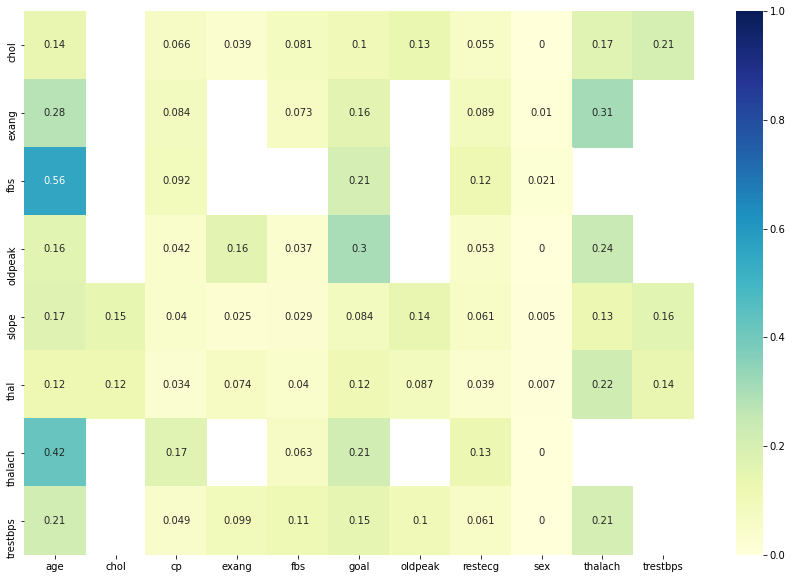

In [ ]:
plt.figure(figsize=(15,10))
kernel.plot_feature_importance(annot=True,cmap="YlGnBu",vmin=0, vmax=1)

Observations:
1. The above shows the importance of the features(on x-axis) in imputing the features(on y-axis). It is good to see that the importance is spread across. This means that the imputation is done using the relationship between multiple variables and not just one variable.

Verifying some imputed values

In [ ]:
comp_df[df['trestbps']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
33,55,1,3,110.0,202.0,0.0,0,155.0,0.0,1.5,2.0,3.0,3


In [ ]:
comp_df[data['chol'].isnull()].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
5,66,1,3,120.0,171.0,0.0,1,120.0,0.0,0.5,1.0,6.0,0
7,60,1,3,180.0,204.0,0.0,1,140.0,1.0,1.5,2.0,7.0,0
8,60,1,3,120.0,270.0,0.0,0,141.0,1.0,2.0,1.0,6.0,3
11,59,1,4,140.0,216.0,0.0,1,117.0,1.0,1.0,2.0,6.0,1
12,62,1,4,110.0,252.0,0.0,0,120.0,1.0,0.5,2.0,3.0,1


## Data Analysis

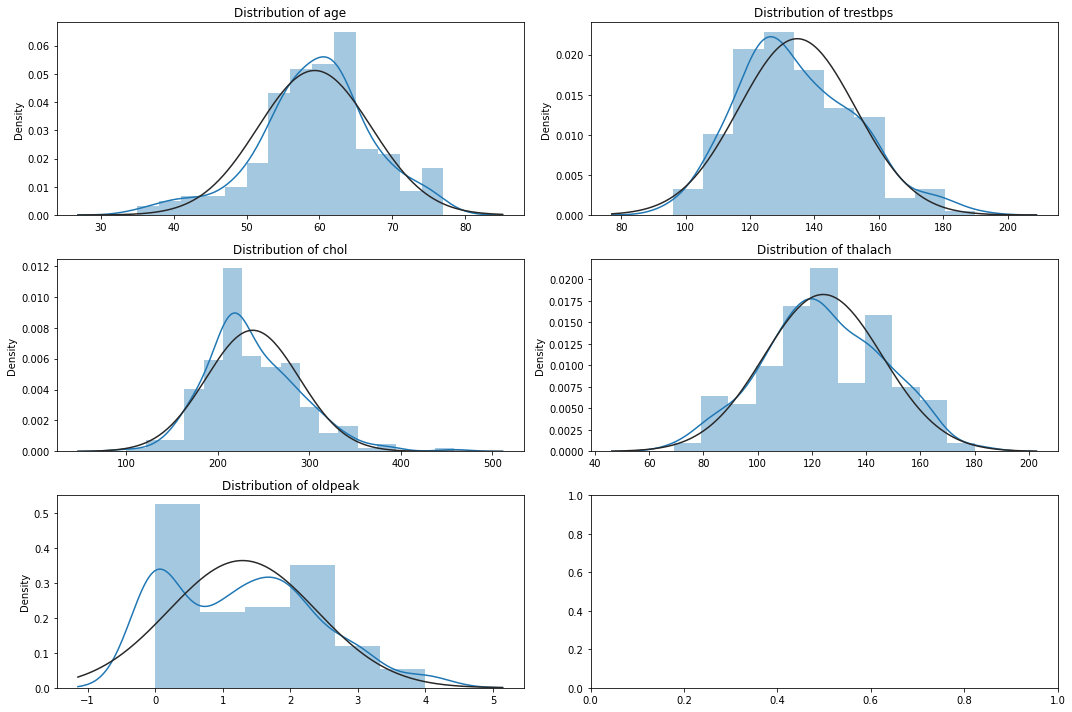

In [ ]:
f,ax = plt.subplots(3,2,figsize=(15,10))
f.tight_layout()
columns=['age','trestbps','chol','thalach','oldpeak']
i,j = 0,0
for col in columns:
    graph = sns.distplot(comp_df[col],fit=norm, ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Distribution of {col}')
    plt.tight_layout()
    
    j+=1
    if j%2==0:
        i+=1
        j=0

Observations:
1. There is a slight skew in all of the distributions.
2. However all the distribution is close to normal.

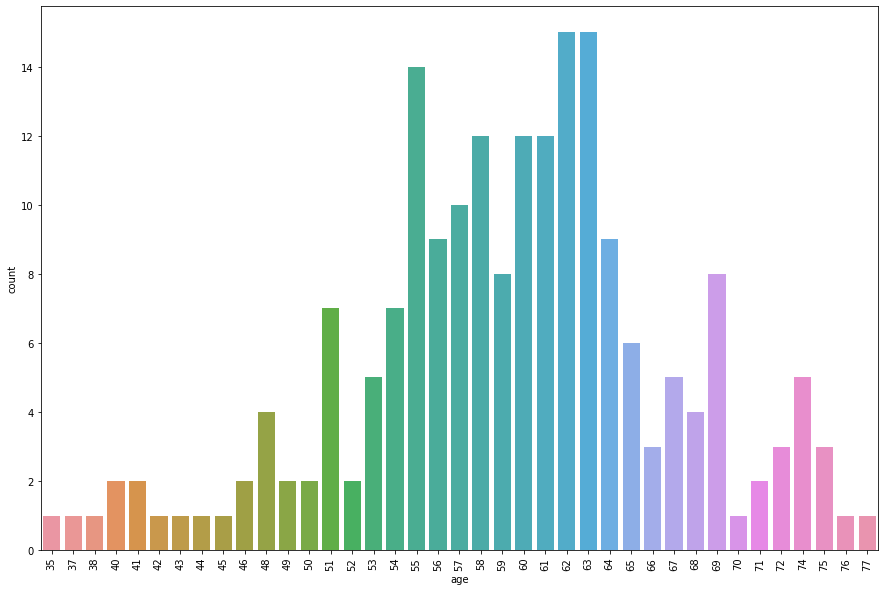

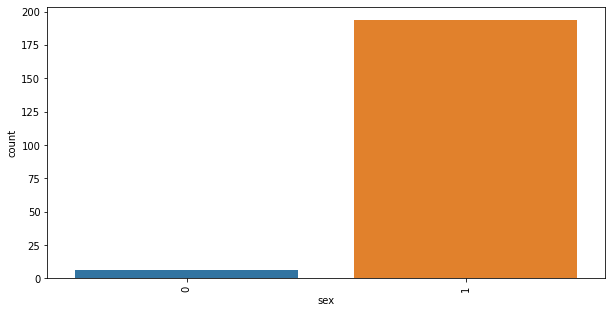

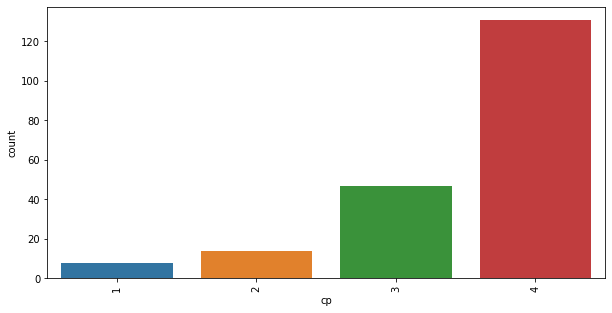

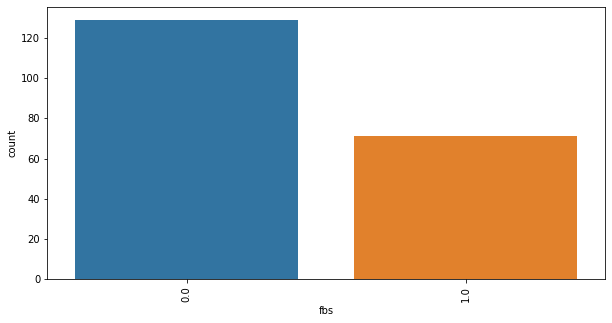

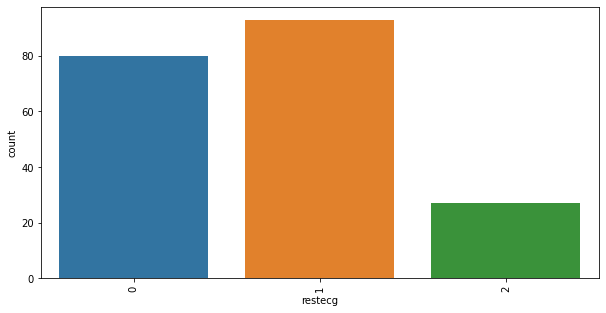

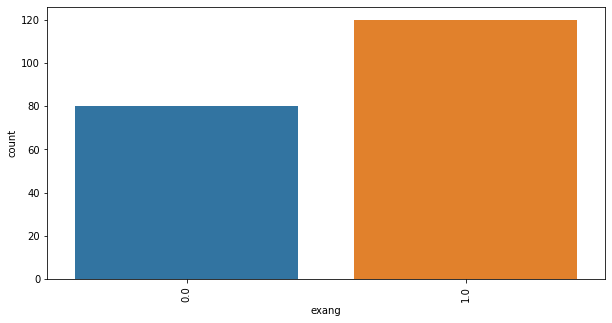

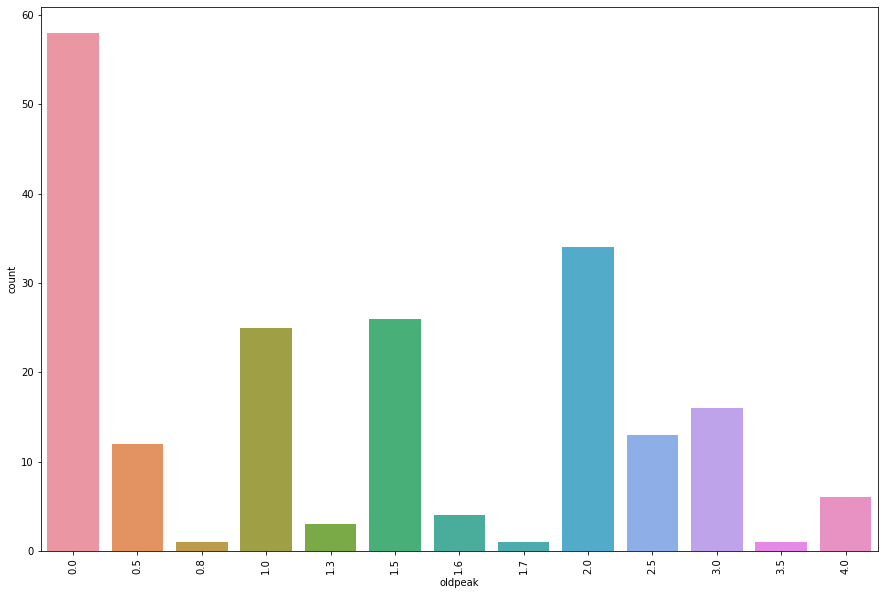

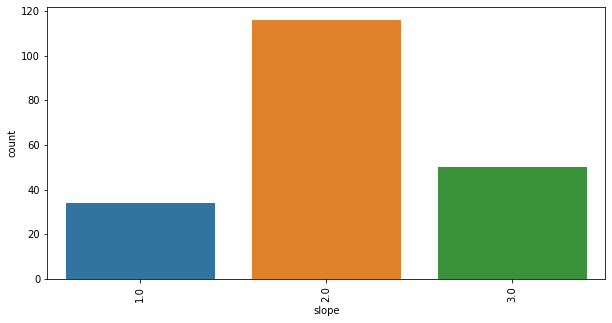

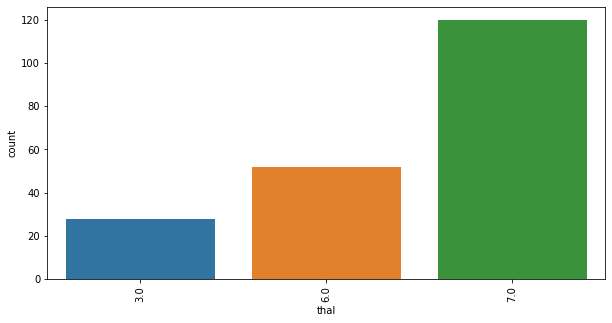

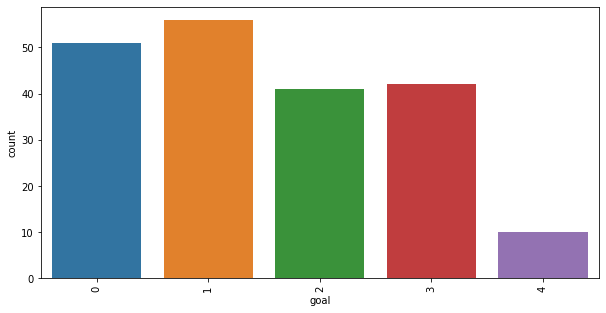

In [ ]:
columns = ['age', 'sex', 'cp', 'fbs', 'restecg','exang', 'oldpeak', 'slope', 'thal', 'goal']
for col in columns:
    if comp_df[col].nunique() > 5:
        plt.figure(figsize=(15,10))
    else:
        plt.figure(figsize=(10,5))
    sns.countplot(comp_df[col])
    plt.xticks(rotation=90)
    plt.show()
    

Observations:
1. age: There are more patients in the dataset between the age 54 to 65.
2. sex: The categories are very imbalance in sex. '1' is dominating by a lot.
3. cp: Also an imbalanced dataset. '4' has the most samples.
4. oldpeak: There are some categories(0.5,1.7,3.5) with very low samples.
5. goal: We are dealing with an imbalanced classification problem. I will also look into the possibilities of merging some classes together.

In [ ]:
def show_distribution(data, col, func):
    if func == 'count':
        plt.figure(figsize=(15,7))
        plt.title(f"Frequency of {col}")
        sns.countplot(data[col], hue = data['goal'])
        plt.show()
    elif func == 'dist':
        plt.figure(figsize=(15,5))        
        plt.title(f"Distribution on {col}")
        
        plt.axvline(np.mean(data[data['goal']==0][col]), color='b', linestyle='--')
        plt.axvline(np.mean(data[data['goal']==1][col]), color='y', linestyle='--')        
        plt.axvline(np.mean(data[data['goal']==2][col]), color='g', linestyle='--')        
        plt.axvline(np.mean(data[data['goal']==3][col]), color='r', linestyle='--')        
        plt.axvline(np.mean(data[data['goal']==4][col]), color='orange', linestyle='--')
        
        sns.distplot(data[data['goal']==0][col], hist=False, color='b')
        sns.distplot(data[data['goal']==1][col], hist=False, color='y')
        sns.distplot(data[data['goal']==2][col], hist=False, color='g')
        sns.distplot(data[data['goal']==3][col], hist=False, color='r')
        sns.distplot(data[data['goal']==4][col], hist=False, color='orange')


        plt.legend([0,1,2,3,4])
        plt.show()

#### age

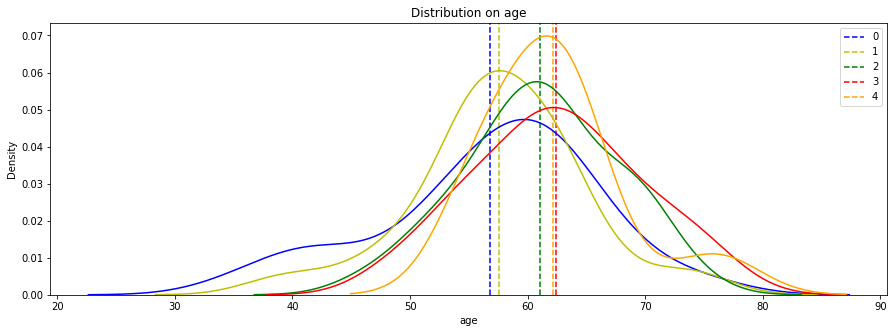

In [ ]:
show_distribution(comp_df, 'age', 'dist')

Observations:
1. The means for goals '0' and '1' samples are very close to each other and classes 2,3 and 4 are close to each other.
2. If we group 0 and 1 together as one class and 2,3 and 4 together as another class we may get a clear distinction between the combined classes.

#### sex

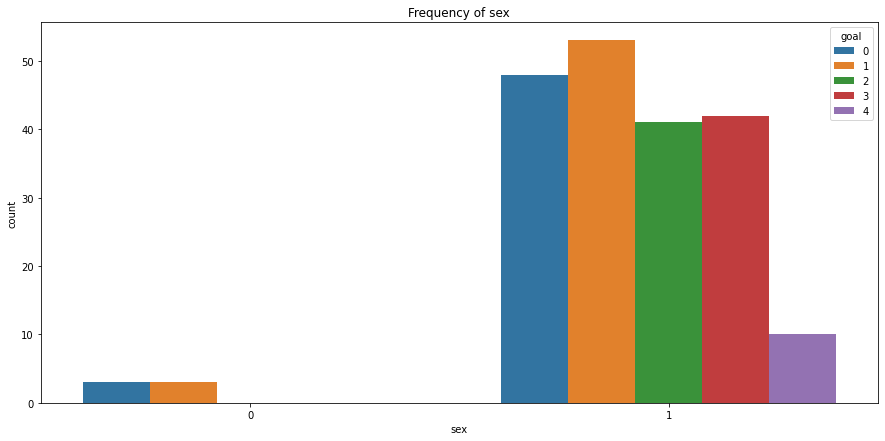

In [ ]:
show_distribution(comp_df, 'sex', 'count')

Observations:
1. For sex=0, samples for only classes 0 and 1 are available. No samples for 2,3 and 4 available for sex=0.

#### cp

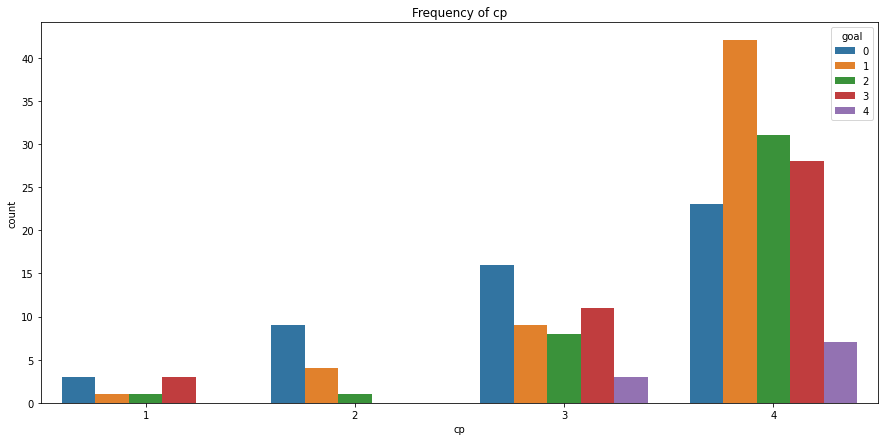

In [ ]:
show_distribution(comp_df, 'cp', 'count')

Observations:
1. For cp=1, we have samples only for classes 0,1,2 and 3.
2. For cp=2 we have samples only for 0,1 and 2.

### trestbps

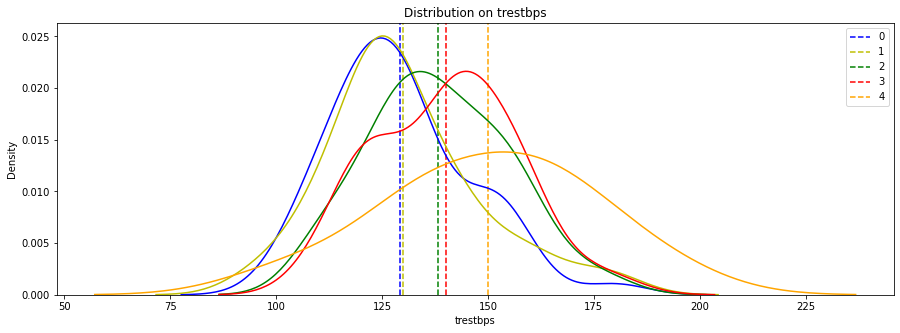

In [ ]:
show_distribution(comp_df, 'trestbps', 'dist')

Observations:
1. With respect to trestbps, we can see that the means of classes 0 and 1 together, means of classes 2 and 3 together and mean class 4 are showing distinction from each other.
2. This is indicating that classes may be suitable for merging.

#### chol

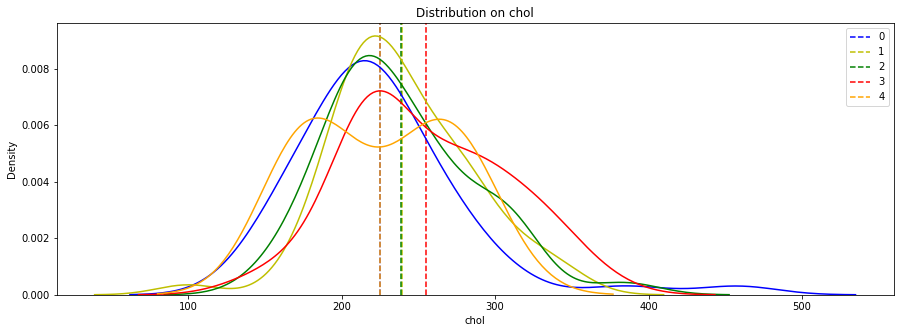

In [ ]:
show_distribution(comp_df, 'chol', 'dist')

Observations:
1. In chol, the mean of classes 0 and 1 are overlapping, means of classes 2 and 4 are very close.
2. Here there is an indication of 3 classes.

#### fbs

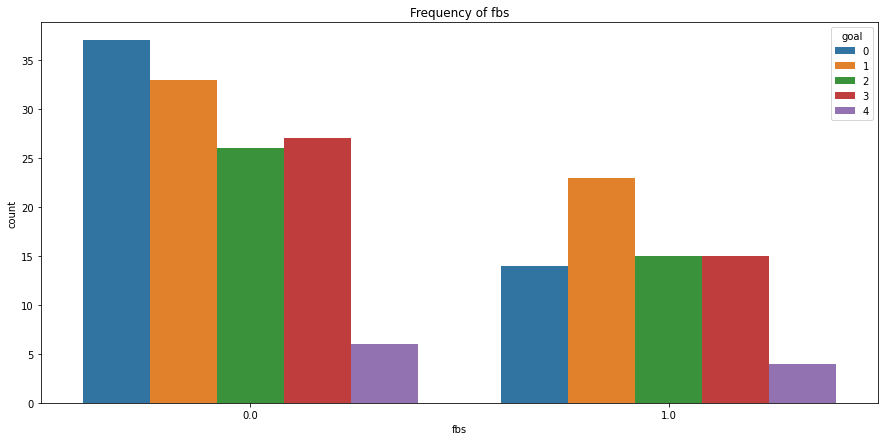

In [ ]:
show_distribution(comp_df, 'fbs', 'count')

Observations:
1. All classes are available in 0 and 1 categories of fbs.

#### restecg

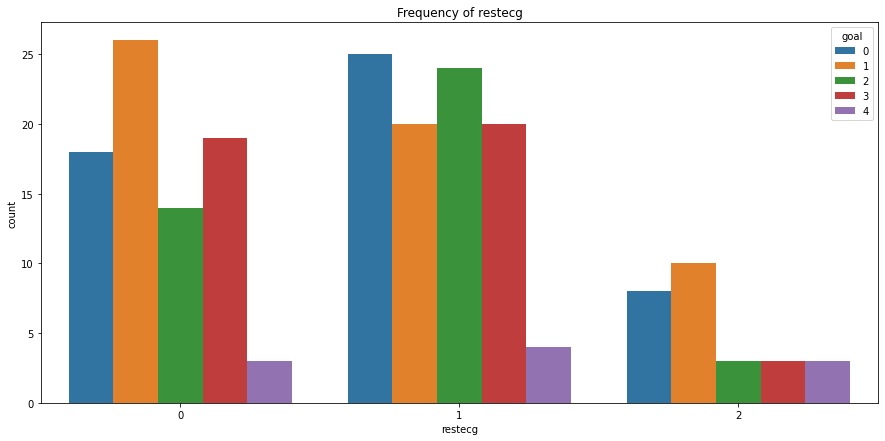

In [ ]:
show_distribution(comp_df, 'restecg', 'count')

Observations:
1. All classes available for all categories

#### thalach

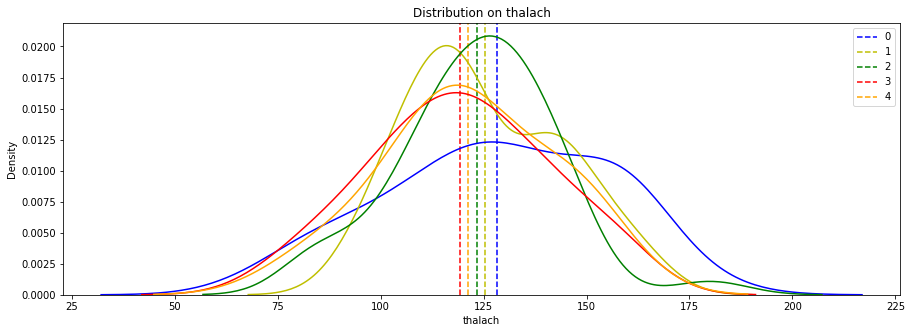

In [ ]:
show_distribution(comp_df, 'thalach', 'dist')

Observations:
1. The means of Classes 0 and 3 are well apart in case of thalach.

#### exang

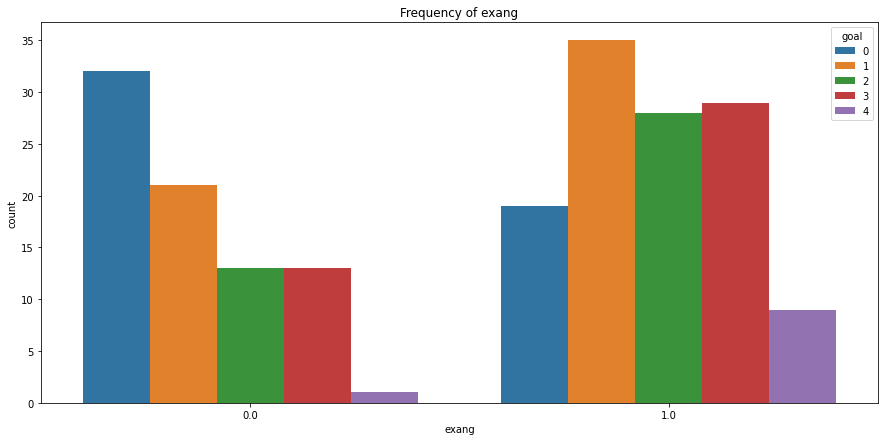

In [ ]:
show_distribution(comp_df, 'exang', 'count')

All classes are available for all categories in exang, however, class 4 is very less in exang=0

#### oldpeak

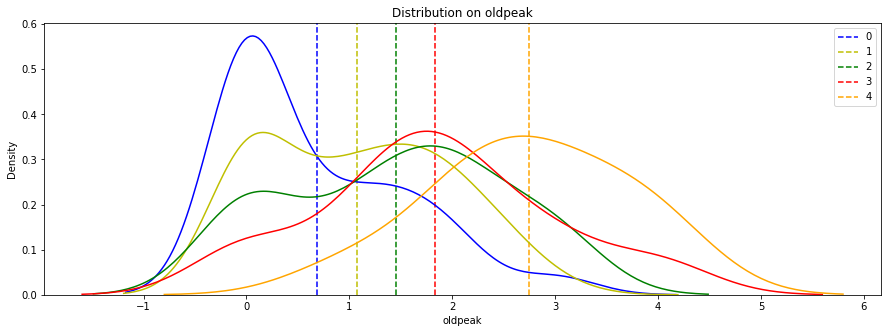

In [ ]:
show_distribution(comp_df, 'oldpeak', 'dist')

Observations:
1. In oldpeak, the mean of all classes are well distinguished.

#### slope

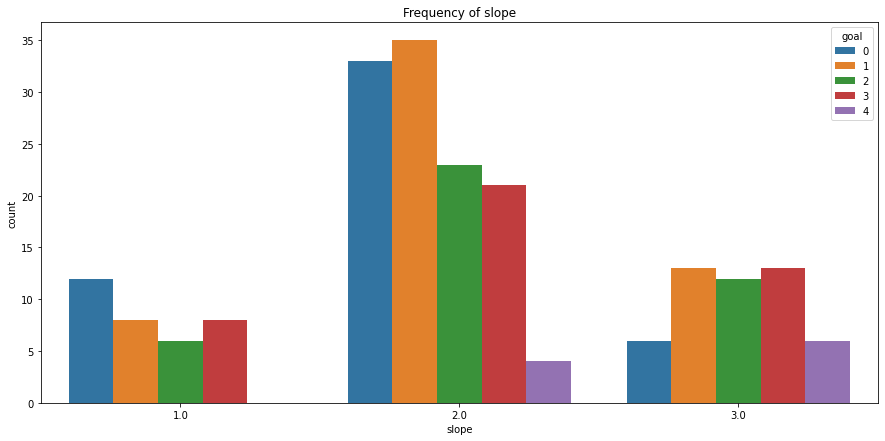

In [ ]:
show_distribution(comp_df, 'slope', 'count')

Observations:
1. Sample for goal=4 is not available for slope=1.

#### thal

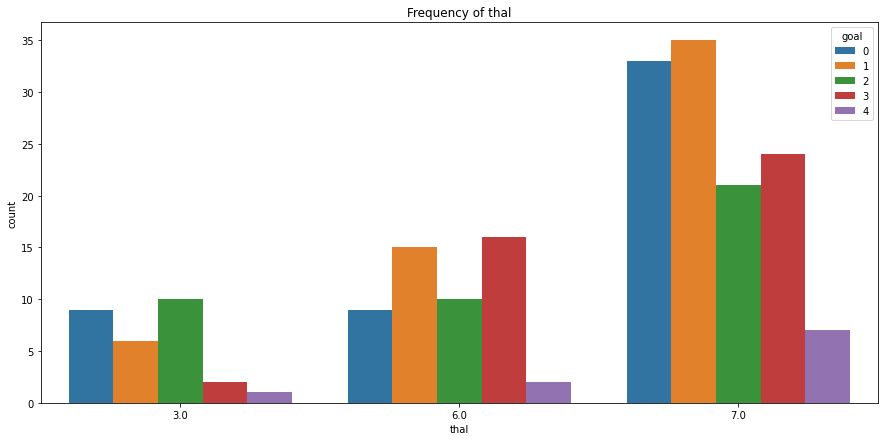

In [ ]:
show_distribution(comp_df, 'thal', 'count')

Observations:
1. Sample for goal=4 is very less in thal=3

## Outliers

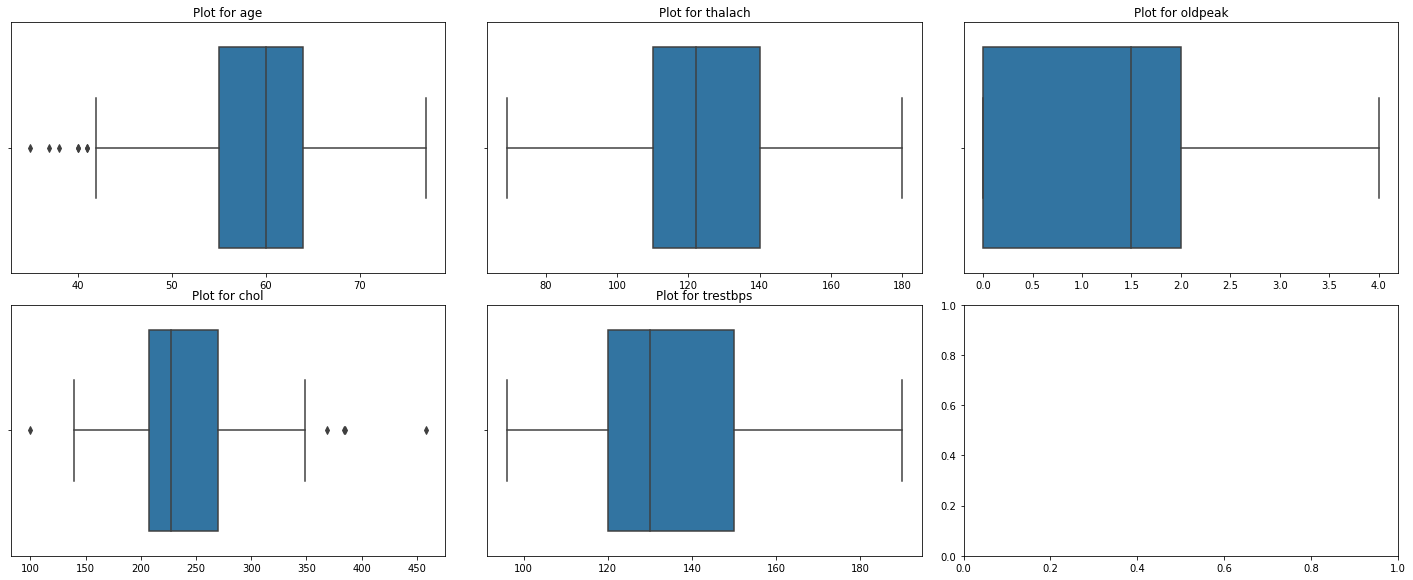

In [ ]:
f,ax = plt.subplots(2,3,figsize=(20,8))
f.tight_layout()
columns=['age','thalach','oldpeak','chol','trestbps']
i,j = 0,0
for col in columns:
    
    graph = sns.boxplot(comp_df[col], ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%3==0:
        i+=1
        j=0

Observations:
1. There are some outliers in Age. This is acceptable since its showing age from 35 years which is acceptable.
2. There are some outliers in Chol. This is also in the natural outlier range. Normal: under 150 mg/dL. Borderline high: 150-199 mg/dL. High: 200-499 mg/dL. Very high: 500 mg/dL or higher
3. No need to remove the outliers.

## Skewness

In [ ]:
comp_df.agg(['skew','kurtosis'])

,age,trestbps,chol,thalach,oldpeak
skew,-0.404091,0.465753,0.755712,0.010809,0.428628
kurtosis,0.630973,-0.066273,1.495702,-0.352647,-0.607172


Observations:
1. The skewness in the data is not a lot.
2. The 'chol' shows a positive skew. This is expected as there are some patients in the dataset with high cholestrol.

Converting the variables back to numeric


In [ ]:
for col in comp_df1.columns:
  comp_df1[col]=comp_df1[col].astype(str(df[col].dtypes))
  
comp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    float64
 11  goal      200 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 18.9 KB


In [ ]:
for col in comp_df.columns:
  comp_df[col]=comp_df[col].astype(str(df[col].dtypes))
  
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    float64
 11  thal      200 non-null    float64
 12  goal      200 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.4 KB


## Correlation

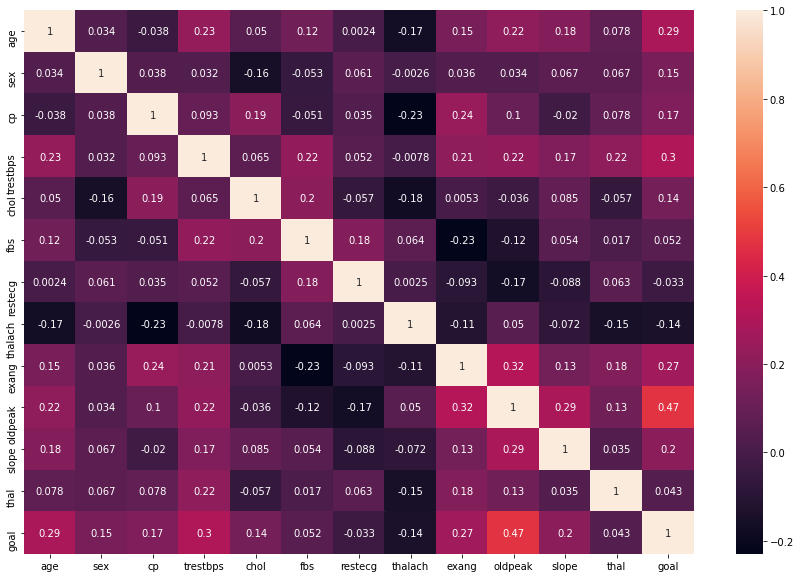

In [ ]:
corr= comp_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()


Observations:
1. There are some negative correlations, however the correlation of goal is spread across the features.

## Separating the features and target variables

Data without 'thal'

In [ ]:
x1 = comp_df1.drop(['goal'], axis=1)
y1 = comp_df1['goal']

Data with 'thal'

In [ ]:
x = comp_df.drop(['goal'], axis=1)
y = comp_df['goal']

## Data Transformation and Scaling

Since we have some natural outliers, RobustScaler might be a good option. Since there is not much skewness in the data we may not need a transformation.

Still I will experiment with RobustScaler vs MinMaxScaler and with and without PowerTransformer to which performs better.

Robust Scaler

Data without 'thal'

In [ ]:
rs1 = RobustScaler()
x_rs1 = rs1.fit_transform(x1)
pd.DataFrame(x_rs1, columns=comp_df1.drop(['goal'],axis=1).columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.333333,0.0,0.0,0.444444,0.523438,0.0,0.0,-0.262295,0.0,0.75,0.0
1,-1.777778,0.0,0.0,0.000000,-0.273438,0.0,0.0,0.229508,-1.0,-0.75,0.0
2,0.000000,0.0,0.0,0.088889,-0.132812,0.0,0.0,0.655738,0.0,0.00,1.0
3,-0.555556,0.0,0.0,0.533333,0.023438,0.0,0.0,0.950820,0.0,0.50,-1.0
4,0.666667,0.0,-1.0,-0.888889,-0.210938,1.0,1.0,-0.688525,0.0,-0.10,0.0


Data with 'thal'

In [ ]:
rs = RobustScaler()
x_rs = rs.fit_transform(x)
pd.DataFrame(x_rs, columns=comp_df.drop(['goal'],axis=1).columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.333333,0.0,0.0,0.333333,0.523810,0.0,0.0,-0.333333,0.0,0.75,0.0,0.0
1,-1.777778,0.0,0.0,0.000000,-0.285714,0.0,0.0,0.166667,-1.0,-0.75,-4.0,-1.0
2,0.000000,0.0,0.0,0.066667,-0.142857,0.0,0.0,0.600000,0.0,0.00,4.0,-1.0
3,-0.555556,0.0,0.0,0.400000,0.015873,0.0,0.0,0.900000,0.0,0.50,-4.0,0.0
4,0.666667,0.0,-1.0,-0.666667,-0.222222,1.0,1.0,-0.766667,0.0,-0.10,0.0,0.0


MinMaxScaler

Data without 'thal'

In [ ]:
sc1 = MinMaxScaler()
x_sc1 = sc1.fit_transform(x1)
pd.DataFrame(x_sc1, columns=comp_df1.drop(['goal'],axis=1).columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.666667,1.0,1.000000,0.468085,0.446927,0.0,0.5,0.387387,1.0,0.750,0.5
1,0.214286,1.0,1.000000,0.361702,0.304469,0.0,0.5,0.522523,0.0,0.000,0.5
2,0.595238,1.0,1.000000,0.382979,0.329609,0.0,0.5,0.639640,1.0,0.375,1.0
3,0.476190,1.0,1.000000,0.489362,0.357542,0.0,0.5,0.720721,1.0,0.625,0.0
4,0.738095,1.0,0.666667,0.148936,0.315642,1.0,1.0,0.270270,1.0,0.325,0.5


Data with 'thal'

In [ ]:
sc = MinMaxScaler()
x_sc = sc.fit_transform(x)
pd.DataFrame(x_sc, columns=comp_df.drop(['goal'],axis=1).columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.666667,1.0,1.000000,0.468085,0.446927,0.0,0.5,0.387387,1.0,0.750,0.5,1.00
1,0.214286,1.0,1.000000,0.361702,0.304469,0.0,0.5,0.522523,0.0,0.000,0.0,0.75
2,0.595238,1.0,1.000000,0.382979,0.329609,0.0,0.5,0.639640,1.0,0.375,1.0,0.75
3,0.476190,1.0,1.000000,0.489362,0.357542,0.0,0.5,0.720721,1.0,0.625,0.0,1.00
4,0.738095,1.0,0.666667,0.148936,0.315642,1.0,1.0,0.270270,1.0,0.325,0.5,1.00


PowerTransformer

Data without 'thal'

In [ ]:
rs_pt1 = PowerTransformer(standardize=False)
sc_pt1 = PowerTransformer(standardize=False)
x_rs_pt1 = rs_pt1.fit_transform(x_rs1)
x_sc_pt1 = sc_pt1.fit_transform(x_sc1)

Data with 'thal'

In [ ]:
rs_pt = PowerTransformer(standardize=False)
sc_pt = PowerTransformer(standardize=False)
x_rs_pt = rs_pt.fit_transform(x_rs)
x_sc_pt = sc_pt.fit_transform(x_sc)

Checking performance

Data without 'thal'

In [ ]:
x_train_rs1, x_test_rs1, y_train_rs1, y_test_rs1 = train_test_split(x_rs1, y1, test_size = 0.20, random_state = 0, stratify = y1)
x_train_sc1, x_test_sc1, y_train_sc1, y_test_sc1 = train_test_split(x_sc1, y1, test_size = 0.20, random_state = 0, stratify = y1)
x_train_rs_pt1, x_test_rs_pt1, y_train_rs_pt1, y_test_rs_pt1 = train_test_split(x_rs_pt1, y1, test_size = 0.20, random_state = 0, stratify = y1)
x_train_sc_pt1, x_test_sc_pt1, y_train_sc_pt1, y_test_sc_pt1 = train_test_split(x_sc_pt1, y1, test_size = 0.20, random_state = 0, stratify = y1)

Data with 'thal'

In [ ]:
x_train_rs, x_test_rs, y_train_rs, y_test_rs = train_test_split(x_rs, y, test_size = 0.20, random_state = 0, stratify = y)
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y, test_size = 0.20, random_state = 0, stratify = y)
x_train_rs_pt, x_test_rs_pt, y_train_rs_pt, y_test_rs_pt = train_test_split(x_rs_pt, y, test_size = 0.20, random_state = 0, stratify = y)
x_train_sc_pt, x_test_sc_pt, y_train_sc_pt, y_test_sc_pt = train_test_split(x_sc_pt, y, test_size = 0.20, random_state = 0, stratify = y)

Data without 'thal'

In [ ]:
rnd1 = RandomForestClassifier(class_weight='balanced',max_depth=2)

print("RobustScaler without 'thal'")
rnd1.fit(x_train_rs1, y_train_rs1)
print('Train score without RobustScaler: ',f1_score(y_train_rs1,rnd1.predict(x_train_rs1), average='weighted'))
print('Test score without RobustScaler: ',f1_score(y_test_rs1, rnd1.predict(x_test_rs1), average='weighted'))


print("\nMinMaxScaler without 'thal'")
rnd1.fit(x_train_sc1, y_train_sc1)
print('Train score with MinMaxScaler: ',f1_score(y_train_sc1,rnd1.predict(x_train_sc1), average='weighted'))
print('Test score with MinMaxScaler: ',f1_score(y_test_sc1, rnd1.predict(x_test_sc1), average='weighted'))

print("\nRobustScaler+PowerTransformer without 'thal'")
rnd1.fit(x_train_rs_pt1, y_train_rs_pt1)
print('Train score with RobustScaler+PowerTransformer: ',f1_score(y_train_rs_pt1,rnd1.predict(x_train_rs_pt1), average='weighted'))
print('Test score with RobustScaler+PowerTransformer: ',f1_score(y_test_rs_pt1, rnd1.predict(x_test_rs_pt1), average='weighted'))

print("\nMinMaxScaler+PowerTransformer without 'thal'")
rnd1.fit(x_train_sc_pt1, y_train_sc_pt1)
print('Train score with MinMaxScaler+PowerTransformer: ',f1_score(y_train_sc_pt1,rnd1.predict(x_train_sc_pt1), average='weighted'))
print('Test score with MinMaxScaler+PowerTransformer: ',f1_score(y_test_sc_pt1, rnd1.predict(x_test_sc_pt1), average='weighted'))

RobustScaler without 'thal'
Train score without RobustScaler:  0.4321027930402931
Test score without RobustScaler:  0.3098557692307692

MinMaxScaler without 'thal'
Train score with MinMaxScaler:  0.4922688731025402
Test score with MinMaxScaler:  0.3453118137900747

RobustScaler+PowerTransformer without 'thal'
Train score with RobustScaler+PowerTransformer:  0.5100815958487738
Test score with RobustScaler+PowerTransformer:  0.30258152173913044

MinMaxScaler+PowerTransformer without 'thal'
Train score with MinMaxScaler+PowerTransformer:  0.44900559969009457
Test score with MinMaxScaler+PowerTransformer:  0.3450000000000001


Data with 'thal'

In [ ]:
rnd = RandomForestClassifier(class_weight='balanced',max_depth=2)

print("RobustScaler with 'thal'")
rnd.fit(x_train_rs, y_train_rs)
print('Train score with RobustScaler: ',f1_score(y_train_rs,rnd.predict(x_train_rs), average='weighted'))
print('Test score with RobustScaler: ',f1_score(y_test_rs, rnd.predict(x_test_rs), average='weighted'))


print("\nMinMaxScaler with 'thal'")
rnd.fit(x_train_sc, y_train_sc)
print('Train score with MinMaxScaler: ',f1_score(y_train_sc,rnd.predict(x_train_sc), average='weighted'))
print('Test score with MinMaxScaler: ',f1_score(y_test_sc, rnd.predict(x_test_sc), average='weighted'))

print("\nRobustScaler+PowerTransformer with 'thal'")
rnd.fit(x_train_rs_pt, y_train_rs_pt)
print('Train score with RobustScaler+PowerTransformer: ',f1_score(y_train_rs_pt,rnd.predict(x_train_rs_pt), average='weighted'))
print('Test score with RobustScaler+PowerTransformer: ',f1_score(y_test_rs_pt, rnd.predict(x_test_rs_pt), average='weighted'))

print("\nMinMaxScaler+PowerTransformer with 'thal'")
rnd.fit(x_train_sc_pt, y_train_sc_pt)
print('Train score with MinMaxScaler+PowerTransformer: ',f1_score(y_train_sc_pt,rnd.predict(x_train_sc_pt), average='weighted'))
print('Test score with MinMaxScaler+PowerTransformer: ',f1_score(y_test_sc_pt, rnd.predict(x_test_sc_pt), average='weighted'))

RobustScaler with 'thal'
Train score with RobustScaler:  0.5539760719604425
Test score with RobustScaler:  0.34471709965450714

MinMaxScaler with 'thal'
Train score with MinMaxScaler:  0.562833750348638
Test score with MinMaxScaler:  0.31261716544325235

RobustScaler+PowerTransformer with 'thal'
Train score with RobustScaler+PowerTransformer:  0.507610561173622
Test score with RobustScaler+PowerTransformer:  0.36534819347319347

MinMaxScaler+PowerTransformer with 'thal'
Train score with MinMaxScaler+PowerTransformer:  0.540435458377239
Test score with MinMaxScaler+PowerTransformer:  0.34327380952380954


Observations:
1. Data with 'thal' is giving better score.
2. Robust Scaler is giving us a better performance with a low variance. Hence it will be used going forward.

## Finding the random state

In [ ]:
best_train_score = 0
best_test_score = 0
best_r_state = 0

for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x_rs, y ,test_size = 0.20, random_state=i, stratify=y)
    lr = LogisticRegression(class_weight='balanced',multi_class='multinomial')
    lr.fit(x_train, y_train)
    train_pred = lr.predict(x_train)
    test_pred = lr.predict(x_test)
    
    train_score = f1_score(y_train, train_pred, average='weighted')
    test_score = f1_score(y_test, test_pred, average='weighted')

    #Making sure that the variace is as low as possible
    if round(train_score*100) == round(test_score*100):
        if test_score > best_test_score:
            best_test_score = test_score
            best_train_score = train_score
            best_r_state = i
        
print(f'At the Random_State {best_r_state}, the model performs very well.')
print(f'Train score is {best_train_score*100}')
print(f'Test score is {best_test_score*100}')

At the Random_State 15, the model performs very well.
Train score is 51.05195995143159
Test score is 51.203416149068325


Splitting the data into train and test with random state 15

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rs, y ,test_size = 0.20, random_state=15, stratify=y)

## Model Selection

In [ ]:
models = [LogisticRegression(class_weight='balanced', multi_class='multinomial'),DecisionTreeClassifier(class_weight='balanced'),KNeighborsClassifier(weights='distance'),GaussianNB(),SVC(class_weight='balanced')]

results = []
m_names = []
for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=243, shuffle=True)
    cv_result = cross_val_score(model, x_train, y_train, cv= kfold, scoring = 'f1_weighted')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    

LogisticRegression: Mean score: 0.353  Variance: 0.016
DecisionTreeClassifier: Mean score: 0.336  Variance: 0.016
KNeighborsClassifier: Mean score: 0.322  Variance: 0.007
GaussianNB: Mean score: 0.156  Variance: 0.006
SVC: Mean score: 0.385  Variance: 0.016


Observations:
1. All models are performing poorly than a model that makes a random guess prediction. The reason must be the nature of the dataset as this had heavy missing data.
2. The LogisticRegression and SVC are giving better score with respect to the other models.

### Ensemble Techniques

In [ ]:
models = [LogisticRegression(class_weight='balanced', multi_class='multinomial'), SVC(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'), AdaBoostClassifier(n_estimators=100),GradientBoostingClassifier(),RandomForestClassifier(class_weight='balanced'),XGBClassifier(eval_metric='logloss', objective='multi:softmax')]
results = []
m_names = []

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=243, shuffle=True)
    cv_result = cross_val_score(model, x_train, y_train, cv= kfold, scoring = 'f1_weighted')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")

LogisticRegression: Mean score: 0.353  Variance: 0.016
SVC: Mean score: 0.385  Variance: 0.016
DecisionTreeClassifier: Mean score: 0.303  Variance: 0.02
AdaBoostClassifier: Mean score: 0.256  Variance: 0.015
GradientBoostingClassifier: Mean score: 0.34  Variance: 0.011
RandomForestClassifier: Mean score: 0.302  Variance: 0.01
XGBClassifier: Mean score: 0.296  Variance: 0.007


Observations:
1. Even the ensemble techniques are performing poorly.
2. Top models are LogisticRegression, SVC and GradientBoostingClassifier.

## HyperParameter Tuning

In [ ]:
def hyper_tune_SVC(a,b):
    params = [{'C': [0.01,0.05,0.1,0.5,1], 'kernel':['linear', 'poly', 'rbf', 'sigmoid' ],'gamma' : ['scale','auto'], 'decision_function_shape':['ovo','ovr']}]
    # Select an algorithm
    algorithm = SVC(class_weight='balanced')
    
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=5, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
def hyper_tune_KNeighborsClassifier(a,b):
    params = [{'n_neighbors': [3,5], 'weights': ['distance'],
              'algorithm' : ['auto'],
             'p':[1,2]}]
    # Select an algorithm
    algorithm = KNeighborsClassifier()
    
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=5, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
def hyper_tuned_RandomForestClassifier(a, b):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
    # Number of features to consider at every split
    max_features = ['auto', 'log2']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
    # Create the random grid
    params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'criterion':['gini','entropy']}
    
    algorithm = RandomForestClassifier(class_weight='balanced')
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=5, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
def hyper_tuned_LogisticRegression(a, b, split = 5):
    # Number of trees in random forest
    fit_intercept = [True, False]
    # Number of features to consider at every split
    solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
    
    # Create the random grid
    params = {'fit_intercept': fit_intercept,
               'solver': solver}
    
    algorithm = LogisticRegression(class_weight='balanced', multi_class='multinomial')
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=split, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
def hyper_tuned_GradientBoostingClassifier(a, b):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
    # Number of features to consider at every split
    max_features = ['auto', 'log2']
    #learning rate
    learning_rate = [0.05,0.5,0.1,1]
    
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]

    
    # Create the random grid
    params = {'n_estimators': n_estimators,
               'max_features': max_features,
              'criterion':['friedman_mse','mse'],
              'learning_rate':learning_rate,
               'max_depth': max_depth}
    
    algorithm = GradientBoostingClassifier()
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=5, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
def hyper_tuned_XGBClassifier(a, b):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
    # Number of features to consider at every split
    max_features = ['auto', 'log2']
    #learning rate
    learning_rate = [0.05,0.5,0.1,1]
    #booster
    booster = ['gbtree','gblinear']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]

    
    # Create the random grid
    params = {'n_estimators': n_estimators,
               'max_features': max_features,
              'learning_rate':learning_rate,
              'booster':booster,
               'max_depth': max_depth}
    
    algorithm = XGBClassifier(objective='multi:softmax', eval_metric='logloss')
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=5, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
models = [hyper_tune_SVC,hyper_tuned_GradientBoostingClassifier,hyper_tuned_LogisticRegression,hyper_tuned_XGBClassifier]

model_result = {}
results = []
m_names = []

for model in models:
    name = model
    print(model)
    result = (model(x_train, y_train))
    model_result[name] = result
    

<function hyper_tune_SVC at 0x7f7ea5da7840>
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1787s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0232s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0404s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0748s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1462s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished
[P

<function hyper_tuned_GradientBoostingClassifier at 0x7f7ea5db5840>
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.8min
[Paralle

<function hyper_tuned_LogisticRegression at 0x7f7ea6680048>
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0398s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0820s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1156s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


<function hyper_tuned_XGBClassifier at 0x7f7ef64db400>
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Paralle

In [ ]:
for i, j in model_result.items():
  print(f"Model: {j[1]}\nScore: {j[0]}\nParameters: {j[2]}\n")

Model: SVC(C=0.05, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Score: 0.38125
Parameters: {'C': 0.05, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}

Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=77,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=650,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                      

Observations:
1. Even after tuning the models, the score is pretty low.
2. The SVC Model is the best performing model among the others.

Testing with the test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rs, y ,test_size = 0.20, random_state=15, stratify=y)

In [ ]:
#'C': 0.05, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'
svc_model = SVC(C = 0.05, decision_function_shape = 'ovo', gamma = 'scale', kernel = 'linear')
svc_model.fit(x_train, y_train)
svc_mod_train_pred = svc_model.predict(x_train)
svc_mod_test_pred = svc_model.predict(x_test)
print("Training scores: ")
print("Accuracy score: ", accuracy_score(y_train, svc_mod_train_pred))
print("F1 score: ", f1_score(y_train, svc_mod_train_pred, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_train, svc_mod_train_pred))
print("Classification Report\n", classification_report(y_train, svc_mod_train_pred))

print("\nTest scores: ")
print("Accuracy score: ", accuracy_score(y_test, svc_mod_test_pred))
print("F1 score: ", f1_score(y_test, svc_mod_test_pred, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_test, svc_mod_test_pred))
print("Classification Report\n", classification_report(y_test, svc_mod_test_pred))

Training scores: 
Accuracy score:  0.44375
F1 score:  0.4262189298796442
Confusion Matrix
 [[20 16  2  3  0]
 [ 9 30  2  4  0]
 [ 4 14 10  5  0]
 [ 3 18  1 11  0]
 [ 1  2  1  4  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.54      0.49      0.51        41
           1       0.38      0.67      0.48        45
           2       0.62      0.30      0.41        33
           3       0.41      0.33      0.37        33
           4       0.00      0.00      0.00         8

    accuracy                           0.44       160
   macro avg       0.39      0.36      0.35       160
weighted avg       0.46      0.44      0.43       160


Test scores: 
Accuracy score:  0.375
F1 score:  0.32516339869281047
Confusion Matrix
 [[5 4 1 0 0]
 [2 8 1 0 0]
 [0 4 0 4 0]
 [1 6 0 2 0]
 [0 0 0 2 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.

In [ ]:
log_model = LogisticRegression(class_weight='balanced', fit_intercept = False, solver = 'liblinear')
log_model.fit(x_train, y_train)
log_mod_train_pred = log_model.predict(x_train)
log_mod_test_pred = log_model.predict(x_test)
print("Training scores: ")
print("Accuracy score: ", accuracy_score(y_train, log_mod_train_pred))
print("F1 score: ", f1_score(y_train, log_mod_train_pred, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_train, log_mod_train_pred))
print("Classification Report\n", classification_report(y_train, log_mod_train_pred))

print("\nTest scores: ")
print("Accuracy score: ", accuracy_score(y_test, log_mod_test_pred))
print("F1 score: ", f1_score(y_test, log_mod_test_pred, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_test, log_mod_test_pred))
print("Classification Report\n", classification_report(y_test, log_mod_test_pred))

Training scores: 
Accuracy score:  0.4625
F1 score:  0.46062884894703837
Confusion Matrix
 [[27  3  5  5  1]
 [10 16  8  7  4]
 [ 6  4 11  8  4]
 [ 4  4  5 15  5]
 [ 0  1  0  2  5]]
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.66      0.61        41
           1       0.57      0.36      0.44        45
           2       0.38      0.33      0.35        33
           3       0.41      0.45      0.43        33
           4       0.26      0.62      0.37         8

    accuracy                           0.46       160
   macro avg       0.44      0.49      0.44       160
weighted avg       0.48      0.46      0.46       160


Test scores: 
Accuracy score:  0.45
F1 score:  0.4496961713747285
Confusion Matrix
 [[6 1 2 0 1]
 [4 4 1 1 1]
 [2 0 2 3 1]
 [1 1 1 5 1]
 [0 0 0 1 1]]
Classification Report
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.67

Observations:
1. Notice that the best tunned model, LogisticRegression is giving only a score of 0.48 for test and 0.56 for train set, however it is better than SVC because LogisticRegression is giving a low variance than SVC in this problem.
2. The model has High bias and low variance. We need more data in order to train the model and reduce the bias.
3. None of the models are able to learn the function in the dataset because the dataset is very small and had a lot of missing values and a lot of imputation was done.

### Saving Model and predictions: - Modelled with cleaned data

Models will be saved at the end of this notebook.

Looking for others ways to solve this problem

# Attempting to increase the prediction score

Since the models are not giving good results,so, 

1. Look for natural clusters in the dataset and find the models that perform well in each clusters.
2. Try to merge(meaningfully) the classes in target to reduce the number of classes and see if it helps.

## 1. Cluster Analysis

In [ ]:
#Using the Scaled data
X_new = pd.DataFrame(x_rs)
y_new = comp_df['goal']

In [ ]:
#To find the number of natural clusters in the dataset
def elbow_plot(data):
    try:
        #an empty list to store the within cluster sum of errors
        wcss = []
    
        for i in range(1, 12):
            #initializing kmeans object
            kmeans = KMeans(n_clusters=i, init='k-means++', n_jobs=-1)
            kmeans.fit(data)
            wcss.append(kmeans.inertia_)
        #plotting the elbow - no of clusters vs wcss
        plt.plot(range(1,12), wcss)
        plt.title("Elbow plot - Elbow method")
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        #saving the plot
        plt.show()
        #plt.savefig('./models/kmeans_elbow.png')
        #finding the optimum number of clusters programmatically
        kn = KneeLocator(range(1,12), wcss, curve = 'convex', direction = 'decreasing')
        return kn.knee
    except Exception as e:
        print(e)


In [ ]:
def create_clusters(data):
    df = data.copy()
    try:
        number_of_clusters = elbow_plot(df)
        print(number_of_clusters)
        kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=0)
            #predict the cluster number
        y_kmeans = kmeans.fit_predict(df)
        df['clusters'] = y_kmeans
        return df,kmeans
    except Exception as e:
        print(e)

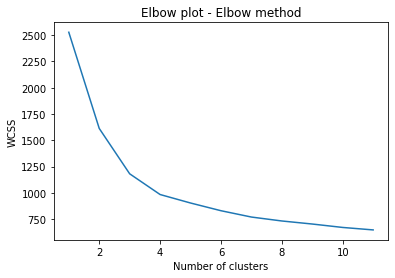

4
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
Number of clusters formed: 4


,0,1,2,3,4,5,6,7,8,9,10,11,clusters,goal
0,0.333333,0.0,0.0,0.333333,0.523810,0.0,0.0,-0.333333,0.0,0.75,0.0,0.0,3,2
1,-1.777778,0.0,0.0,0.000000,-0.285714,0.0,0.0,0.166667,-1.0,-0.75,-4.0,-1.0,0,0
2,0.000000,0.0,0.0,0.066667,-0.142857,0.0,0.0,0.600000,0.0,0.00,4.0,-1.0,2,2
3,-0.555556,0.0,0.0,0.400000,0.015873,0.0,0.0,0.900000,0.0,0.50,-4.0,0.0,0,1
4,0.666667,0.0,-1.0,-0.666667,-0.222222,1.0,1.0,-0.766667,0.0,-0.10,0.0,0.0,3,0


In [ ]:
#Finding the clusters in the independent variables of the data and alloting clusters
X_new_c, kmeans_cls = create_clusters(X_new)

#Combining the dependent and independent variables
data_c = X_new_c.copy()
data_c['goal'] = y_new
print(kmeans_cls)
print(f"Number of clusters formed: {len(data_c['clusters'].unique())}")

data_c.head()

Observations:
1. KMeans is able to identify 4 clusters in the dataset(only the independent variable).

In [ ]:
data_c['clusters'].value_counts()

3    100
2     50
0     34
1     16
Name: clusters, dtype: int64

In [ ]:
#Splitting into X and y
x_c = data_c.drop(['goal'],axis=1)
y_c = data_c['goal']

#Splitting into train and test
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c,y_c,test_size = 0.20, random_state=243, stratify=y_c)

#Combining the X and y of training data
train_combined = x_train_c.copy()
train_combined['goal']= y_train_c
print(train_combined.shape)
train_combined['goal'].value_counts()

(160, 14)


1    45
0    41
3    33
2    33
4     8
Name: goal, dtype: int64

Identifying best models for each cluster

In [ ]:

for cluster in train_combined['clusters'].unique():
    
    print('For Cluster ',cluster)
    models = [LogisticRegression(class_weight='balanced', solver='liblinear'), KNeighborsClassifier(weights='distance'), AdaBoostClassifier(n_estimators=100),GradientBoostingClassifier(),RandomForestClassifier(class_weight='balanced'),XGBClassifier(eval_metric='logloss', objective='multi:softmax')]
    results = []
    m_names = []
    mean_result = []
    
    x = train_combined[train_combined['clusters'] == cluster].drop(['goal','clusters'],axis=1)
    y = train_combined[train_combined['clusters'] == cluster]['goal']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.40, random_state=243, stratify=y)
    for model in models:
        name = model.__class__.__name__
        
        kfold = KFold(n_splits=5, random_state=243, shuffle=True)
        cv_result = cross_val_score(model, x_train, y_train, cv= kfold, scoring = 'f1_micro')
        results.append(cv_result)
        m_names.append(name)
        print(f"{name}:   Mean score: {round(cv_result.mean()*100,3)}")
        mean_result.append(round(cv_result.mean(),3))
    print("\n")
    #plt.plot(mean_result)
    
    #plt.xticks(ticks = np.arange(len(m_names)+1),labels=m_names, rotation = 45)
    #plt.show()


For Cluster  2
LogisticRegression:   Mean score: 24.0
KNeighborsClassifier:   Mean score: 8.0
AdaBoostClassifier:   Mean score: 28.0
GradientBoostingClassifier:   Mean score: 25.0
RandomForestClassifier:   Mean score: 28.0
XGBClassifier:   Mean score: 33.0


For Cluster  3
LogisticRegression:   Mean score: 36.889
KNeighborsClassifier:   Mean score: 55.333
AdaBoostClassifier:   Mean score: 24.667
GradientBoostingClassifier:   Mean score: 41.111
RandomForestClassifier:   Mean score: 40.889
XGBClassifier:   Mean score: 36.889


For Cluster  0
LogisticRegression:   Mean score: 25.0
KNeighborsClassifier:   Mean score: 35.0
AdaBoostClassifier:   Mean score: 36.667
GradientBoostingClassifier:   Mean score: 30.0
RandomForestClassifier:   Mean score: 35.0
XGBClassifier:   Mean score: 30.0


For Cluster  1
LogisticRegression:   Mean score: 40.0
KNeighborsClassifier:   Mean score: 0.0
AdaBoostClassifier:   Mean score: 0.0
GradientBoostingClassifier:   Mean score: 20.0
RandomForestClassifier:   Me

Observations:
1. The models are not performing well even when the dataset is broken down into clusters.

Best model in each cluster:
1. Cluster 0: AdaBoost
2. Cluster 1: LogisticRegression
3. Cluseter 2: XGBClassifier
4. Cluster 3: KNN


In [ ]:
def hyper_tuned_AdaBoostClassifier(a, b):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
    #learning rate
    learning_rate = [0.05,0.5,0.1,1]
    #algorithm
    algorithm = ['SAMME','SAMME.R']
    
    max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
    # Create the random grid
    params = {'n_estimators': n_estimators,
              'learning_rate':learning_rate,
              'algorithm':algorithm}
    
    algorithm = AdaBoostClassifier()
    # Search for best hyperparameters
    grid = GridSearchCV(estimator=algorithm, param_grid=params, cv=3, scoring='f1_micro', n_jobs = -1, verbose=10)
    grid.fit(a, b)
    # Get the results
    return (grid.best_score_,grid.best_estimator_,grid.best_params_)

In [ ]:
train_combined['clusters'].value_counts()

3    82
2    39
0    27
1    12
Name: clusters, dtype: int64

In [ ]:
for cluster in train_combined['clusters'].unique():
    
    print('For Cluster ',cluster)
        
    x = train_combined[train_combined['clusters'] == cluster].drop(['goal','clusters'],axis=1)
    y = train_combined[train_combined['clusters'] == cluster]['goal']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=243)
    
    
    if cluster == 0:
      cls0_result = (hyper_tuned_AdaBoostClassifier(x_train, y_train))
      
    elif cluster == 1:
      cls1_result = (hyper_tuned_LogisticRegression(x_train, y_train, 3))
      
    elif cluster == 2:
      cls2_result = (hyper_tuned_XGBClassifier(x_train, y_train))
      
    elif cluster == 3:
      cls3_result = (hyper_tune_KNeighborsClassifier(x_train, y_train))

In [ ]:
print(f"Cluster 0: {cls0_result[1]} | Score : {cls0_result[0]}  |  Parameters: {cls0_result[2]}")
print(f"Cluster 1: {cls1_result[1]} | Score : {cls1_result[0]}  |  Parameters: {cls1_result[2]}")
print(f"Cluster 2: {cls2_result[1]} | Score : {cls2_result[0]}  |  Parameters: {cls2_result[2]}")
print(f"Cluster 3: {cls3_result[1]} | Score : {cls3_result[0]}  |  Parameters: {cls3_result[2]}")

Cluster 0: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=650, random_state=None) | Score : 0.38095238095238093  |  Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 650}
Cluster 1: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) | Score : 0.2222222222222222  |  Parameters: {'fit_intercept': True, 'solver': 'newton-cg'}
Cluster 2: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              max_features='auto', min_child_weight=1, missing=None

Observations:
1. Still the predictions are very poor.

## 2. Merge classes in Target

In [ ]:
#Taking a copy of the cleaned data
n =comp_df.copy()
n.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
goal        0
dtype: int64

Based on the Data analysis performed on target variable 'goal' against each feature in the dataset,

1. Merging classes 0 and 1 into class '0' .
2. Merging classes 2,3 and 4 into class '1'.

In [ ]:
#merging the classes
n['goal'] = n['goal'].map({0:0,1:0,
                           2:1,3:1,4:1})

In [ ]:
n['goal'].value_counts()

0    107
1     93
Name: goal, dtype: int64

Observations:
1. Now we have a more balanced classification problem.

#### Separating features and target.

In [ ]:
x_n = n.drop(['goal'],axis=1)
yn = n['goal']

#### Scaling dataset

In [ ]:
r = RobustScaler()
xrs=r.fit_transform(x_n)

#### finding optimum Random State

In [ ]:
best_train_score = 0
best_test_score = 0
best_r_state = 0

for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(xrs, yn ,test_size = 0.20, random_state=i, stratify=yn)
    lr = LogisticRegression(solver='liblinear')
    lr.fit(x_train, y_train)
    train_pred = lr.predict(x_train)
    test_pred = lr.predict(x_test)
    
    train_score = f1_score(y_train, train_pred)
    test_score = f1_score(y_test, test_pred)

    #Making sure that the variace is as low as possible
    if round(train_score*100) == round(test_score*100):
        if test_score > best_test_score:
            best_test_score = test_score
            best_train_score = train_score
            best_r_state = i
        
print(f'At the Random_State {best_r_state}, the model performs very well.')
print(f'Train score is {best_train_score*100}')
print(f'Test score is {best_test_score*100}')

At the Random_State 620, the model performs very well.
Train score is 74.12587412587412
Test score is 74.4186046511628


Observations:
1. We can see that the model is performing a lot better when we merged the classes.
2. Random state 620 is found to be optimum way to split train and test set.

#### Splitting train and test set

In [ ]:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(xrs, yn ,test_size = 0.20, random_state=620, stratify=yn)

#### Model Selection

In [ ]:
models = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]

results = []
m_names = []
for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=620, shuffle=True)
    cv_result = cross_val_score(model, x_trainr, y_trainr, cv= kfold, scoring = 'f1_micro')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    

LogisticRegression: Mean score: 0.738  Variance: 0.005
DecisionTreeClassifier: Mean score: 0.6  Variance: 0.013
KNeighborsClassifier: Mean score: 0.681  Variance: 0.009
GaussianNB: Mean score: 0.494  Variance: 0.018
SVC: Mean score: 0.719  Variance: 0.01


Observations:
1. LogisticRegression and SVC are perform well.

#### Ensemble Techniques

In [ ]:
models = [LogisticRegression(solver='liblinear'), KNeighborsClassifier(), AdaBoostClassifier(n_estimators=100),GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier()]
results = []
m_names = []

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=620, shuffle=True)
    cv_result = cross_val_score(model, x_trainr, y_trainr, cv= kfold, scoring = 'f1_micro')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")

LogisticRegression: Mean score: 0.738  Variance: 0.005
KNeighborsClassifier: Mean score: 0.681  Variance: 0.009
AdaBoostClassifier: Mean score: 0.619  Variance: 0.007
GradientBoostingClassifier: Mean score: 0.65  Variance: 0.017
RandomForestClassifier: Mean score: 0.669  Variance: 0.011
XGBClassifier: Mean score: 0.681  Variance: 0.011


Observations:
1. LogisticRegression. KNeighborsClassifier and RandomForest are performing fine.

#### Hyper parameter tuning

In [ ]:
models = [hyper_tune_KNeighborsClassifier,hyper_tuned_RandomForestClassifier,hyper_tuned_LogisticRegression]

model_result = {}
results = []
m_names = []

for model in models:
    name = model
    if model == 'hyper_tuned_XGBClassifier':
      result = (model(x_trainr, y_trainr, cls='bin'))
    else:
      result = (model(x_trainr, y_trainr))
    model_result[name] = result
    

In [ ]:
for i, j in model_result.items():
  print(f"Model: {j[1]}\nScore: {j[0]}\nParameters: {j[2]}\n")

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')
Score: 0.69375
Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score: 0.75
Parameters: {'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 1100}

Model: LogisticRegression(C=1.0, cl

In [ ]:
models = [LogisticRegression(class_weight='balanced', fit_intercept = True, solver = 'liblinear'),
          RandomForestClassifier(class_weight='balanced', criterion = 'gini', max_depth = 100, max_features = 'log2', n_estimators = 1100)]

results = []
m_names = []

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=620, shuffle=True)
    cv_result = cross_val_score(model, x_trainr, y_trainr, cv= kfold, scoring = 'f1_micro')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")

LogisticRegression: Mean score: 0.719  Variance: 0.007
RandomForestClassifier: Mean score: 0.688  Variance: 0.013


In [ ]:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(xrs, yn ,test_size = 0.25, random_state=620, stratify=yn)

In [ ]:
log_model_2 = LogisticRegression(class_weight='balanced', fit_intercept = True, solver = 'liblinear')
log_model_2.fit(x_trainr, y_trainr)
log_mod_train_preds_2 = log_model_2.predict(x_trainr)
log_mod_test_preds_2 = log_model_2.predict(x_testr)
print("Training scores: ")
print("Accuracy score: ", accuracy_score(y_trainr, log_mod_train_preds_2))
print("Roc_AUC score: ", roc_auc_score(y_trainr, log_mod_train_preds_2))
print("F1 score: ", f1_score(y_trainr, log_mod_train_preds_2, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_trainr, log_mod_train_preds_2))
print("Classification Report\n", classification_report(y_trainr, log_mod_train_preds_2))

print("\nTest scores: ")
print("Accuracy score: ", accuracy_score(y_testr, log_mod_test_preds_2))
print("Roc_AUC score: ", roc_auc_score(y_testr, log_mod_test_preds_2))
print("F1 score: ", f1_score(y_testr, log_mod_test_preds_2, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_testr, log_mod_test_preds_2))
print("Classification Report\n", classification_report(y_testr, log_mod_test_preds_2))

Training scores: 
Accuracy score:  0.7466666666666667
Roc_AUC score:  0.7473214285714286
F1 score:  0.7469373219373219
Confusion Matrix
 [[59 21]
 [17 53]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        80
           1       0.72      0.76      0.74        70

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150


Test scores: 
Accuracy score:  0.74
Roc_AUC score:  0.749597423510467
F1 score:  0.7378081091930951
Confusion Matrix
 [[17 10]
 [ 3 20]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.67      0.87      0.75        23

    accuracy                           0.74        50
   macro avg       0.76      0.75      0.74        50
weighted avg       0.77      0.74      0.74        50



Observations:
1. The model prediction score improved.
2. However, the merge I did on the target classes is just based on my intuition in analysis. The actualy relationship between the classes in target may be different.

# Saving the Final models

In [ ]:
#Saving the model from data having target classes [0,1,2,3,4]
#joblib.dump(log_model, './models/heart_disease_model_v1.obj')   #save on local system
joblib.dump(log_model, '/content/heart_disease_model_v1.obj')    #save on google colab


#Saving the model from data having target merged classed [0,1] , where class 0-> 0 and 1 merged. class 1 -> 2,3 and 4 merged
#joblib.dump(log_model, './models/heart_disease_model_v2.obj')   #save on local system
joblib.dump(log_model_2, '/content/heart_disease_model_v2.obj')    #save on google colab

#saving the imputing model
#joblib.dump(kernel, './models/heart_disease_imputer.obj')  #save on local system
joblib.dump(kernel, '/content/heart_disease_imputer.obj')    #save on google colab

['/content/heart_disease_imputer.obj']

In [ ]:
#Saving the predictions from data having target classes [0,1,2,3,4]
#pd.DataFrame(log_mod_test_pred, columns=['goal_predictions_classes_01234']).to_csv('./data/heart_disease_predictions_classes_01234.csv',sep=',')  #save on local system
pd.DataFrame(log_mod_test_pred, columns=['goal_predictions_classes_01234']).to_csv('/content/heart_disease_predictions_classes_01234.csv',sep=',')  #save on google colab

#Saving the predictions from data having target merged classed [0,1] , where class 0-> 0 and 1 merged. class 1 -> 2,3 and 4 merged
#pd.DataFrame(log_mod_test_pred, columns=['goal_predictions_classes_01']).to_csv('./data/heart_disease_predictions_classes_01.csv',sep=',')   #save on local system
pd.DataFrame(log_mod_test_pred, columns=['goal_predictions_classes_01']).to_csv('/content/heart_disease_predictions_classes_01.csv',sep=',')   #save on google colab

Use the following code while loading new data for training or prediction

In [ ]:
new_data =  data.copy()   #<load the new data here>
kernel = joblib.load('/content/heart_disease_imputer.obj')
new_data_imputed = kernel.impute_new_data(new_data=new_data)

print(new_data_imputed.complete_data().head())

   age sex cp  trestbps   chol  fbs  ... thalach  exang oldpeak  slope thal goal
0   63   1  4     140.0  260.0  0.0  ...   112.0    1.0     3.0    2.0  7.0    2
1   44   1  4     130.0  209.0  0.0  ...   127.0    0.0     0.0    2.0  7.0    0
2   60   1  4     132.0  218.0  0.0  ...   140.0    1.0     1.5    3.0  3.0    2
3   55   1  4     142.0  228.0  0.0  ...   149.0    1.0     2.5    1.0  7.0    1
4   66   1  3     110.0  213.0  1.0  ...    99.0    1.0     1.3    2.0  3.0    0

[5 rows x 13 columns]
